# Session 3 Classification

In this project we will work with the California Housing Prices data from Kaggle:
[Link to Kaggle Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

We will work with the "midean_house_value" (house price), however we will transform these data to make it a classification task

## Features

In this project we will work with the following features:  
- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value'
- 'ocean_proximity',

## Data Preparation

- Selecting the features required
- Fill missing values with 0


In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('./housing.csv')
#df
df = df[[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'ocean_proximity',
    'median_house_value'
]]
df = df.fillna(0)
df_initial = df.copy()

# change categorical variables to lower case and _ instead of spaces:
df['ocean_proximity'] = df['ocean_proximity'].str.lower().str.replace(' ', '_')
df.head(3)


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,near_bay,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,near_bay,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,near_bay,352100.0


- Create a new column "rooms_per_household": dividing "total_rooms" by the column "households"

In [4]:
df['room_per_household'] = df['total_rooms'] / df['households']

- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.

In [5]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

- Create a new column population_per_household by dividing the column population by the column households from dataframe.


In [6]:
df['population_per_household'] = df['population'] / df['households']
df.head(2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,room_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,near_bay,452600.0,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,near_bay,358500.0,6.238137,0.155797,2.109842


# Question 1:  
What is the most frequent observation (mode) for the column "ocean_proximity"?

In [7]:
df['ocean_proximity'].value_counts().sort_values(ascending=False)

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: ocean_proximity, dtype: int64

In [8]:
print(f'Mode of "ocean_proximity" feature is:   {df.ocean_proximity.value_counts().sort_values(ascending=False).head(1)}')

Mode of "ocean_proximity" feature is:   <1h_ocean    9136
Name: ocean_proximity, dtype: int64


## Data Splitting

- We will split data in train/validation/test sets by 60/20/20% distribution (using sklean train_test_split and ransom_state=42)
- Split Target variable ("median_house_value")

In [9]:
len(df)

20640

In [10]:
# data splitting:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

n = len(df)
n_full_train = len(df_full_train)
n_test = len(df_test)
n_train = len(df_train)
n_val = len(df_val)

print(f'N_intital = {n}')
print(f'N_full_train = {n_full_train}')
print(f'N_test = {n_test}')
print(f'N_train = {n_train}')
print(f'N_val = {n_val}')
print(f'Test_sum (tran+val+test) = {n_train + n_val + n_test}')

N_intital = 20640
N_full_train = 16512
N_test = 4128
N_train = 12384
N_val = 4128
Test_sum (tran+val+test) = 20640


In [11]:
# separate target variable from datasets:
y_full_train = df_full_train['median_house_value'].values
y_test = df_test['median_house_value'].values
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values

del df_full_train['median_house_value']
del df_test['median_house_value']
del df_train['median_house_value']
del df_val['median_house_value']

# Question 2:

- Create correlation matrix for the numerical features of train dataset
    - In a correlation matrix, we will compute the correlation coefficient between every pair of features in the dataset
- What are the 2 features that have the biggest correlation in this dataset?

In [12]:
corr_matrix_train = df_train.corr()[df_train.corr() != 1]
corr_matrix_train.max().sort_values(ascending=False).head(2)

total_bedrooms    0.979399
households        0.979399
dtype: float64

### Making Target feature into Binary feature

- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [13]:
# create binary target classes:
mean_train = y_train.mean()
mean_val = y_val.mean()
mean_test = y_test.mean()
mean_full_train = y_full_train.mean()
mean_initial = df['median_house_value'].mean()

#print(f'mean_train = {mean_train}')
#print(f'mean_val = {mean_val}')
#print(f'mean_test = {mean_test}')
#print(f'mean_full_train = {mean_full_train}')
#print(f'mean_initial = {mean_initial}')

# we will use mean_initial (on the whole dataset as Threshold):
above_average_train = (y_train > mean_initial).astype(int)
above_average_val = (y_val > mean_initial).astype(int)
above_average_test = (y_test > mean_initial).astype(int)
above_average_full_train = (y_full_train > mean_initial).astype(int)

# Question 3
- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.

In [14]:
from sklearn.metrics import mutual_info_score

In [15]:
score = mutual_info_score(df_train['ocean_proximity'], above_average_train)
score = round(score, 3)
score

0.101

# Question 4

- Now let's train a logistic regression
- For Categorical variable we will use One-hot encoding
- To make sure that the results are reproducible we will use the following model parameters:
    - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Then we will measure the Accuracy of the model on the validation dataset

In [16]:
# one-hot encoding of categorical variable:
dv = DictVectorizer(sparse=False)

# convert all datasets into dictionaries:
dicts_train = df_train.to_dict(orient='records')
dicts_val = df_val.to_dict(orient='records')
dicts_test = df_test.to_dict(orient='records')
# prepare features_matrices:
X_train = dv.fit_transform(dicts_train)
X_val = dv.transform(dicts_val)
X_test = dv.transform(dicts_test)

In [17]:
# train LogisticRegression model:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, above_average_train)
# make predictions on the Validation dataset:
y_pred = model.predict(X_val)
# calculate accuracy:
initial_accuracy = accuracy_score(above_average_val, y_pred)
print(f' accuracy =  {round(accuracy_score(above_average_val, y_pred), 2)}')

 accuracy =  0.84


# Question 5:

- Let's find the least useful feature using the **feature elimination technique**.
- We will use Train a model with all features
- Then, we will exclude each feature from train dataset (1 feature at a time)
- Then for each feature we will compare difference in accuracy with Original Accuracy (model with all features)

In [18]:
df_test_try = df_test.copy()
df_test_try = df_test_try.drop(columns=['longitude'])
df_test_try

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,room_per_household,bedrooms_per_room,population_per_household
20046,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812,inland,4.192201,0.000000,3.877437
3024,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313,inland,5.039384,0.000000,2.679795
15663,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801,near_bay,3.977155,0.000000,1.360332
20484,34.28,17.0,3051.0,0.0,1705.0,495.0,5.7376,<1h_ocean,6.163636,0.000000,3.444444
9814,36.62,34.0,2351.0,0.0,1063.0,428.0,3.7250,near_ocean,5.492991,0.000000,2.483645
...,...,...,...,...,...,...,...,...,...,...,...
15362,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,<1h_ocean,7.002212,0.152291,2.988938
16623,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,near_ocean,6.131915,0.204950,2.340426
18086,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1h_ocean,7.237676,0.130868,2.790493
2144,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,inland,5.289030,0.185880,2.588608


In [19]:
def analyse_model_without_feature(feature_exclude, df_train, df_val, df_test):
    print(f'we study {feature_exclude}')
    df_train = df_train.copy()
    df_val = df_val.copy()
    df_test = df_test.copy()
    # drop studied feature:
    df_train = df_train.drop(columns=[feature_exclude])
    df_val = df_val.drop(columns=[feature_exclude])
    df_test = df_test.drop(columns=[feature_exclude])
    dicts_train = df_train.to_dict(orient='records')
    dicts_val = df_val.to_dict(orient='records')
    dicts_test = df_test.to_dict(orient='records')
    X_train = dv.fit_transform(dicts_train)
    X_val = dv.transform(dicts_val)
    X_test = dv.transform(dicts_test)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, above_average_train)
    y_pred = model.predict(X_val)
    accuracy_iter = accuracy_score(above_average_val, y_pred)
    print(f' accuracy without {feature_exclude} =  {round(accuracy_score(above_average_val, y_pred), 3)}')
    return accuracy_iter

In [20]:
features = []
accuracies = []
differences = []
for feature in df_train.columns:
    features.append(feature)
    accuracy_iter = analyse_model_without_feature(feature, df_train, df_val, df_test)
    accuracies.append(accuracy_iter)
    difference_iter = initial_accuracy - accuracy_iter
    differences.append(difference_iter)
    print(f'difference = {difference_iter}')
    print()

we study latitude
 accuracy without latitude =  0.834
difference = 0.0021802325581395943

we study longitude
 accuracy without longitude =  0.833
difference = 0.0031492248062016115

we study housing_median_age
 accuracy without housing_median_age =  0.831
difference = 0.005329457364341095

we study total_rooms
 accuracy without total_rooms =  0.836
difference = -0.0002422480620154488

we study total_bedrooms
 accuracy without total_bedrooms =  0.835
difference = 0.0009689922480620172

we study population
 accuracy without population =  0.826
difference = 0.009932170542635732

we study households
 accuracy without households =  0.833
difference = 0.0029069767441860517

we study median_income
 accuracy without median_income =  0.786
difference = 0.04990310077519389

we study ocean_proximity
 accuracy without ocean_proximity =  0.82
difference = 0.015988372093023284

we study room_per_household
 accuracy without room_per_household =  0.836
difference = -0.0002422480620154488

we study bed

In [21]:
# put data into df for analysis:
df_analysis = pd.DataFrame({
    'feature': features,
    'accuracy': accuracies,
    'difference': differences
})
df_analysis['abs_difference'] = df_analysis['difference'].abs()
df_analysis['accuracy_initial'] = initial_accuracy
df_analysis = df_analysis[['feature', 'accuracy_initial', 'accuracy', 'difference', 'abs_difference']]
df_analysis.sort_values(by='abs_difference')

,feature,accuracy_initial,accuracy,difference,abs_difference
10,bedrooms_per_room,0.83624,0.836240,0.000000,0.000000
3,total_rooms,0.83624,0.836483,-0.000242,0.000242
9,room_per_household,0.83624,0.836483,-0.000242,0.000242
11,population_per_household,0.83624,0.835756,0.000484,0.000484
4,total_bedrooms,0.83624,0.835271,0.000969,0.000969
0,latitude,0.83624,0.834060,0.002180,0.002180
6,households,0.83624,0.833333,0.002907,0.002907
1,longitude,0.83624,0.833091,0.003149,0.003149
2,housing_median_age,0.83624,0.830911,0.005329,0.005329
5,population,0.83624,0.826308,0.009932,0.009932


In [22]:
print('total_rooms')

total_rooms


# Question 6:  
- Here we will test "alpha" parameter of Ridge Linear Regression Model from sklearn (regularization strength)
- We will use original "median_house_value" target parameter in Log scale
- We will test Ridge Regression model (Linear Regression with regularization)

In [32]:
# target variable transformation:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [43]:
from sklearn.linear_model import Ridge

# parameters of Ridge model:
alpha_test = 0
list_of_alphas = [0, 0.01, 0.1, 1, 10]
model = Ridge(alpha=alpha_test, solver="sag", random_state=42)
#fit model:
model.fit(X_train, y_train_log)
# make predictions on validation data:
y_pred = model.predict(X_val)
# calc RMSE:
rmse_score = mean_squared_error(y_val_log, y_pred, squared=False) #squared: If True returns MSE value, if False returns RMSE value.
print(f'alpha_test = {alpha_test}, RMSE = {round(rmse_score, 5)}')

alpha_test = 0, RMSE = 0.52406


In [39]:
def test_alpha_ridge(alpha_test):
    model = Ridge(alpha=alpha_test, solver="sag", random_state=42)
    model.fit(X_train, y_train_log)
    y_pred = model.predict(X_val)
    rmse_score = mean_squared_error(y_val_log, y_pred, squared=False)
    rmse_score = round(rmse_score, 5)
    print(f'alpha_test = {alpha_test}, RMSE = {rmse_score}')
    return rmse_score

In [40]:
rmse_scores_list = []
for alpha_test in list_of_alphas:
    rmse_score = test_alpha_ridge(alpha_test)
    rmse_scores_list.append(rmse_score)

alpha_test = 0, RMSE = 0.52406
alpha_test = 0.01, RMSE = 0.52406
alpha_test = 0.1, RMSE = 0.52406
alpha_test = 1, RMSE = 0.52406
alpha_test = 10, RMSE = 0.52406


In [41]:
df_show_rmse = pd.DataFrame({
    'alpha_test': list_of_alphas,
    'rmse_score': rmse_scores_list
})

df_show_rmse

,alpha_test,rmse_score
0,0.00,0.52406
1,0.01,0.52406
2,0.10,0.52406
3,1.00,0.52406
4,10.00,0.52406


<AxesSubplot:xlabel='alpha_test', ylabel='rmse_score'>

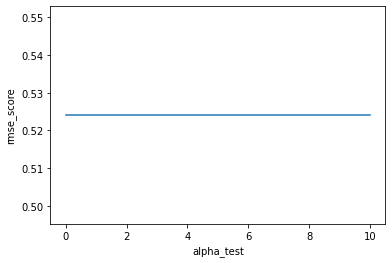

In [42]:
sns.lineplot(data=df_show_rmse, x='alpha_test', y='rmse_score')

In [44]:
print('0')

0
